# Week 2 - Implementation of Shaffer et al

# Week 2 - Implementation of Shaffer et al

In [1]:
# This line tells matplotlib to include plots here
%matplotlib inline
import numpy as np # We'll need numpy later
from scipy.stats import kstest, ttest_ind, ks_2samp, zscore, pareto
import pandas as pd
import matplotlib.pyplot as plt # This lets us access the pyplot functions

## (1) Estimation of a sample mean from a normally distributed variable.

Let us assume that a true distribution of a process is described by the normal distribution with $\mu=5$ and $\sigma=1$. You have a measurement technique that allows you to sample n points from this distribution. In Python we can use a random number generator whose numbers will be chosen from the desired normal distribution by using the function `np.random.normal`. Sample from this normal distribution from n=1 to 50 (i.e. n=1:50). Create a plot for the standard deviation of the calculated mean from each n when you repeat the sampling 1000 times each. (i.e. You will repeat your n observations 1000 times and will calculate the sample mean for each of the 1000 trials).

In [2]:
# Initial code here
def sampleNorm1a(n):
    l = []
    for i in range(1000):
        s = np.random.normal(5,1,n)
        l.append(np.mean(s))
    mean = np.mean(l)
    std = np.std(l)
    return mean, std

def sampleNorm1b(n):
    l = []
    for i in range(1000):
        s = np.random.normal(5,1,n)
        l.append(np.mean(s))
    return l


#### 1a. Plot the standard deviation of the sample mean versus n. Add a second line which is 1/sqrt(n). Describe what this tells you about the relationship between n and your power to estimate the underlying mean.

Solid line is the distribution while the dotted line is the 1/sqrt(n) function


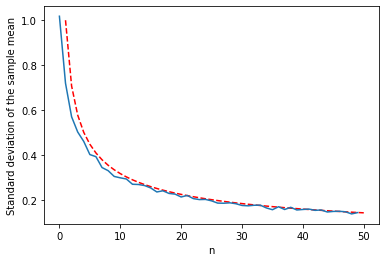

In [3]:
x = list(range(1,51))
Y = []
for n in range(1,51):
    Y.append(sampleNorm1a(n)[1])
# plt.plot(x,Y)
plt.plot(x,1/np.sqrt(x), 'r--',Y)
plt.ylabel('Standard deviation of the sample mean')
plt.xlabel('n')
print("Solid line is the distribution while the dotted line is the 1/sqrt(n) function")

As n increases, our power also increases in its ability to estimate the underlying mean, thus, the standard deviation decreases at this rate that is similar to 1/sqrt(n) -- theoretical equation matches with our std being 1.

#### 1b. Plot the boxplot for the sample means for all values n. Using words, interpret what the boxplot view of the 1000 trials for n=1 means and what the trends in the boxplot demonstrate compared to the plot in 1a. What information do you gain or lose in the two different plotting schemes?

From this plot we get to see the range progressively decrease which makes sense with the std change in the line graph.


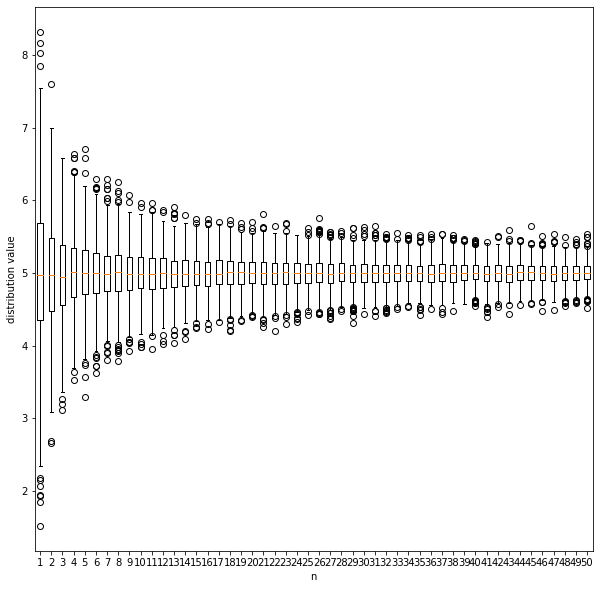

In [4]:
# Answer to 1b here
Y = []

for n in range(1,51):
    Y.append(sampleNorm1b(n))
    
X = list(range(1,51)) 
plt.figure(figsize = (10,10))
plt.boxplot(Y);
plt.xlabel('n')
plt.ylabel('distribution value')
print("From this plot we get to see the range progressively decrease which makes sense with the std change in the line graph.")

    


As n increases, boxplot size decreases and the number of outliers also decrease. Ranges will also compress in. Standard deviation can also be roughly estimated from the boxplots but doesn't necessarily give us the exact standard deviation compared to plot from 1a. Boxplots can also identify whether a big Standard deviation is from a widespread distribution or just a single outlier point that went crazy. Additionally, box plot gives us the actual values of the distribution which std. plotted line does not.

#### 1c. For n=3, plot the histogram of the mean for the 1000 trials. Use the Kolmogorov-Smirnov test to see if this sample distribution is normal. (Hint: You may need to translate this to the *standard* normal distribution.) Report the sample mean and sample standard deviation, the p-value from the test, and whether you would reject the null hypothesis.

Sample mean: 5.007235366820029
Sample standard deviation: 0.5579527802250523
p-value was:0.9152398452581392
We fail to reject the null hypothesis as the p-value is > 0.05


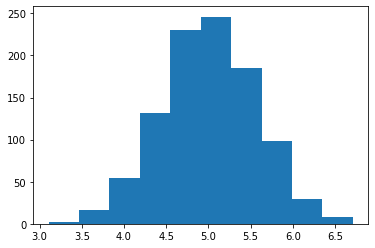

In [5]:
# Answer to 1c here

n = 3
mean = sampleNorm1b(n)
sampleMean = np.mean(mean)
std = np.std(mean)
X = list(range(1,1001))
plt.hist(mean);
zmean = zscore(mean)

a = kstest(zmean,'norm')[1]

print("Sample mean: " + str(sampleMean))
print("Sample standard deviation: " + str(std))
print("p-value was:" + str(a))
print("We fail to reject the null hypothesis as the p-value is > 0.05")

#### 1d. Repeat 1c but for n=20. What changes when the number of samples increases?

Sample mean: 4.996493260990378
Sample standard deviation: 0.23468477124543252
p-value was:0.9096275490398898
We fail to reject the null hypothesis as the p-value is > 0.05
Theoretically we get a closer mean, and smaller standard deviation which should be demonstrated unless we get super lucky(unlucky).


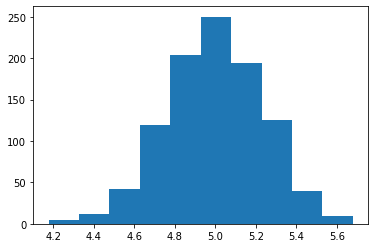

In [6]:
# Answer to 1d here

n = 20
mean = sampleNorm1b(n)
sampleMean = np.mean(mean)
std = np.std(mean)
X = list(range(1,1001))
plt.hist(mean);
zmean = zscore(mean)

a = kstest(zmean,'norm')[1]
print("Sample mean: " + str(sampleMean))
print("Sample standard deviation: " + str(std))
print("p-value was:" + str(a))
print("We fail to reject the null hypothesis as the p-value is > 0.05")
print("Theoretically we get a closer mean, and smaller standard deviation which should be demonstrated unless we get super lucky(unlucky).")



## (2) Now we will explore sampling from an alternate distribution type.

#### 2a. Sample the Pareto distribution (`np.random.pareto`) with parameter shape = 2, 1000 times. Plot the histogram of these values. Describe the shape of this histogram in words. Is it anything like the normal distribution?

(array([881.,  67.,  32.,  10.,   1.,   4.,   1.,   1.,   1.,   2.]),
 array([5.37412517e-04, 1.85805307e+00, 3.71556872e+00, 5.57308437e+00,
        7.43060003e+00, 9.28811568e+00, 1.11456313e+01, 1.30031470e+01,
        1.48606626e+01, 1.67181783e+01, 1.85756939e+01]),
 <BarContainer object of 10 artists>)

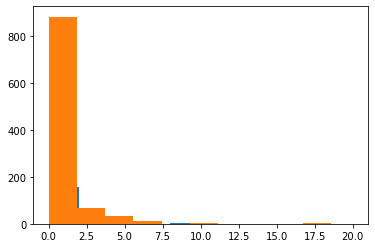

In [7]:
# Answer 2a here
l = []
for i in range(1000):
    a = np.random.pareto(2)
    l.append(a)
z = np.random.pareto(2,1000)
plt.hist(z, bins = range(0,21))
plt.hist(l)

High frequency at lower values. Left favored, so the distribution is skewed right, nothing like normal distribution.

#### 2b. As in problem 1, plot a boxplot of the sample distribution from n=1:50. How does this differ from the plot in 1b and why? Plot the standard deviations of the sample means versus n. Is this any different?

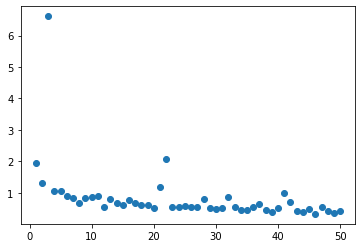

<Figure size 432x288 with 0 Axes>

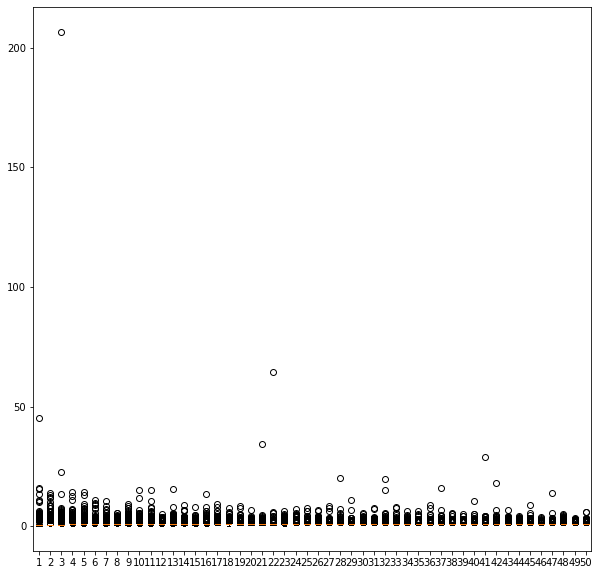

In [8]:
# Answer 2b here
X = np.linspace(1,50)
def samplePareto(n):
    l = []
    for i in range(1000):
        s = np.random.pareto(2,n)
        l.append(np.mean(s))
    mean = l
    std = np.std(l)
    return mean, std
Y_std = []
Y_mean = []
for n in range(50):
    mean, std = samplePareto(n+1)
    Y_std.append(std)
    Y_mean.append(mean)
f_std = plt.figure(1)
plt.scatter(X,Y_std)

f_bxplt = plt.figure(2)
plt.figure(figsize = (10,10))
plt.boxplot(Y_mean);




It is not a consistent downward trend which makes sense as this is not a normal distribution so it will not consistently decrease rather any outlier would significantly change the size of the standard deviation. Probably still downward trend overall though as n increases, the outlier poitns have less of an impact on the standard deviation. But definitely different due to the impact of outliers leading to random spikes. Box plot is different as there are more outlier points very far from the concentrated close to 0 position.

#### 2c. For n=3, plot the histogram of the sample means. What is this distribution—Pareto or normal? Report your test results.

pvalue for norm kstest was: 1.2179386523992342e-44
pvalue for pareto kstest 1.3934021234491137e-39


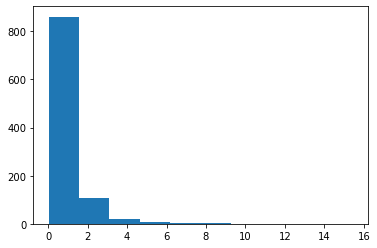

In [9]:
# Answer to 2c

n = 3
mean, std = samplePareto(n)

X = list(range(1,1001))
data = zscore(mean)
plt.hist(mean);
mean = np.array(mean)

norm = kstest(data, "norm")
paretop = kstest(mean+1, 'pareto', args = (2,))
print('pvalue for norm kstest was: ' + str(norm[1]))
print('pvalue for pareto kstest '+ str(paretop[1]) )
            

# null hypothesis: data nad norm are same... we reject null 

As shown by the Kstests, the distribution is defenitely not normal as the p-value is close to 0. Based on the Kstest, this graph is neither pareto nor normal.

#### 2d. Repeat 2b and 2c for n=100.

pvalue for norm kstest was: 1.1204597313572176e-10
pvalue for pareto kstest 0.0


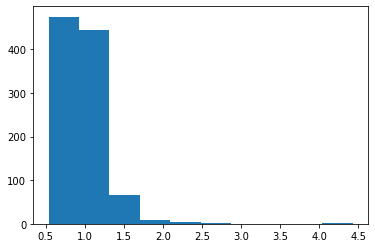

In [10]:
# Answer to 2d


n = 100
mean, std = samplePareto(n)

X = list(range(1,1001))
data = zscore(mean)
plt.hist(mean);
mean = np.array(mean)

norm = kstest(data, "norm")
paretop = kstest(mean+1, 'pareto', args = (2,))
print('pvalue for norm kstest was: ' + str(norm[1]))
print('pvalue for pareto kstest '+ str(paretop[1]) )

Once again, as shown by the Kstests, the distribution is defenitely not normal as the p-value is close to 0. Based on the Kstest, this graph is neither pareto nor normal.

## (3) Differential expression. In this problem you will use the two-sample t-test to explore what differential hypothesis testing looks like in known standards and how multiple hypothesis correction effects the number of false positives and negatives from these tests.
- Distribution 1, normal with mu=1, sigma=1
- Distribution 2, normal with mu=3, sigma=1

#### 3a. False Negative: Using n=3, perform 100 comparisons of distribution 1 versus distribution 2 with an alpha=0.05. Anytime you fail to reject the hypothesis it is a false negative. Why is this a false negative? Report the number of false negatives from your 100 tests.

Hint: It'd be helpful to define a function that does this for you at this point.

In [11]:
# Answer to 3a here.
def sampleNorm3(mu, sigma, n,x):
    l = []
    for i in range(x):
        s = np.random.normal(mu,sigma,n)
        l.append(np.mean(s))
    mean = np.mean(l)
    std = np.std(l)
    return mean, std
def test3(mu1, sigma1,n1, mu2, sigma2,n2, x = 100, p = 0.05):
    l = []
    counter = 0
    for i in range(x):
        distr1 = np.random.normal(mu1,sigma1,n1)
        distr2 = np.random.normal(mu2,sigma2,n2)
        a = ttest_ind(distr1,distr2)
        if(a[1]>p):
            l.append('false negative')
            counter +=1
    return l, counter
comparison, counter = test3(1,1,3,3,1,3,100)
print(comparison)
print(counter)



['false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false negative', 'false ne

Because the distributions aren't the same so when p > 0.05 it is in fact a false negative as it should be a positive since they're not the same

#### 3b. False Positives: Using n=3, perform 100 comparisons of distribution 1 versus distribution 1 with an alpha=0.05. Anytime you reject the hypothesis this is a false positive. Why is this a false positive? Report the number of false positives from your 100 tests.

In [12]:
# Answer to 3b here.

comparison, counter = test3(1,1,3,1,1,3,100)
print('Number of false positives from 100 test for n = 3 with 100 comparisons of \ndistribution 1 versus distribution 1: ' + str(100-counter))

Number of false positives from 100 test for n = 3 with 100 comparisons of 
distribution 1 versus distribution 1: 7


False positive happens as they are in fact the same distribution, so if we are saying that p < 0.05 and thus, we come ot the conclusion that they are different, that is in fact wrong, hence the positives from the t-test should be false positives.

#### 3c. Repeat 3b but 1000 times. What is the number of false positives? Predict the number of false positives you would get if you compared samples from the same distribution 10,000 times and explain why.

In [13]:
# Answer to 3c

comparison, counter = test3(1,1,3,1,1,3,1000)
print(1000-counter)
comparison, counter = test3(1,1,3,1,1,3,10000)
print(10000-counter)



    
#specificity/sensitivity? increases in proportion by the number of times you run it

60
475


I would predict that the increasing the number of times we do the comparison is proportionate to how many false positives that will turn up as the likelihood stays consistent. But also shown above. When 100 comparisons, we got roughly 4 to 5, when 1000, 40 to 50, when 10,0000 we can expect 400-500 plus or minus a bit. 

#### 3d. Now sweep n from 3 to 30 and report the number of false positives and false negatives for each n when you run 100 comparisons. (Provide this in a table format). Please explain the trend you see and interpret its meaning.

In [14]:
# Answer to 3d
X = list(range(3,31)) 
fnC = []
fpC = []
fn = []
fp = []
for n in range(3,31):
    comparison, counter = test3(1,1,n,3,1,n,100)    
    fnC.append(counter)
    fpC.append(100-counter)
    comparison, counter = test3(1,1,n,1,1,n,100)
    fn.append(counter)
    fp.append(100-counter)
d = {'n': X, 'False Negative (mu = 1,3)': fnC, 'False Positive (mu = 1,1)':fp}
#'False Negative (mu = 3, 1)': fnC, 'False Positive (mu = 3,1)': fpC, 
df = pd.DataFrame(data = d)
df


,n,"False Negative (mu = 1,3)","False Positive (mu = 1,1)"
0,3,44,7
1,4,34,2
2,5,13,7
3,6,12,4
4,7,8,9
5,8,2,3
6,9,1,4
7,10,2,4
8,11,0,2
9,12,0,2


False negatives go down which makes sense as the peaks become skinnier and the points will increase around the mean/true value. Additonally power increases as n increases aka 1 - False negative. So as we increase n , the false negatives decrease. But, nothing affects alpha or the false positive rate, thus the likelihood stays the same giving us constant values.

#### 3e. For n=3, suggest how the number of false negatives changes according to sigma for the two distributions and test this. Report your new values and sigma and the number of false negatives in 100 tests.

In [15]:
# Answer to 3e
n = 3
comparison, counter = test3(1,1,n,3,1,n,100)
print(counter)
for sigma in range(1,5):
    comparison, counter = test3(1,sigma,n,3,sigma,n,100)
    print(counter)
    
    #as sigma gets larger, we get more FNs aka type II error

52
50
78
94
84


As sigma gets larger, we gt more false negatives or type II error.

#### 3f. Lastly, perform 3d for p < 0.01 instead of p < 0.05. How does this influence the rate of false positives and negatives? How might you use this when performing many tests?

In [16]:
# Answer to 3f

X = list(range(3,31)) 
fnC = []
fpC = []
fn = []
fp = []
for n in range(3,31):
    comparison, counter = test3(1,1,n,3,1,n,100,0.01)    
    fnC.append(counter)
    fpC.append(100-counter)
    comparison, counter = test3(1,1,n,1,1,n,100,0.01)
    fn.append(counter)
    fp.append(100-counter)
d = {'n': X, 'False Negative (mu = 1,3)': fnC, 'False Positive (mu = 1,1)':fp}
#'False Negative (mu = 3, 1)': fnC, 'False Positive (mu = 3,1)': fpC, 
df = pd.DataFrame(data = d)
df

,n,"False Negative (mu = 1,3)","False Positive (mu = 1,1)"
0,3,87,1
1,4,70,2
2,5,62,1
3,6,40,0
4,7,21,1
5,8,17,0
6,9,10,3
7,10,10,1
8,11,2,1
9,12,2,2


$\textbf{False negatives will go down the same way whereas false positives, while staying constant will be at a lower frequency as p is less likely to be less than 0.01. When performing many tests I can consider reducing p as FP is now closer to 0. By reducing the misclassification error, we can improve the model's performance (hopefully).}$

## (4) Power analysis

Now that we've observed the trends above, we have all the tools to talk about power analysis. Power analysis is an essential step when designing an experiment, and asks *assuming we should be rejecting the null hypothesis, what is the probability we will do so*. The power of an experiment is equal to 1 minus the false negative rate. A common choice for the power of an experiment (like a p-value cutoff of 0.05) is 0.8.

#### 4a. Power analysis is often used to determine the necessary N of an experiment. Why might this be used as opposed to the false positive rate?

Answer:
Power decreases when null hypothesis becomes closer to alternate hypothesis. We know that when n increaess, the null and alternate will have less overlap.
As n gets bigger, the probability of type 1 and type 2 error's decrease. 

#### 4b. Determine the necessary N to acheive a power of 0.8 from the situation in (3).

In [17]:
# Answer.
#Power of test = True positives 1-beta aka 1 - FN
n = 3
comparison, counter = test3(1,1,n,3,1,n,100,0.05)
power = 1 - (counter/100)
print("Power: " + str(power))
print(counter)

while(power < 0.8):
    comparison, counter = test3(1,1,n,3,1,n,100,0.05)
    power = 1 - (counter/100)
    n += 1
print(power)
print(n)

Power: 0.52
48
0.92
7


## (5) Shaffer et al

In this excercise we're going to explore some basic concepts of statistics, and use them to build up to some more advanced ideas. To examine these ideas we're going to consider a classic of molecular biology—the [Luria-Delbrück experiment](https://en.wikipedia.org/wiki/Luria–Delbrück_experiment). The data we'll use is from [Shaffer et al](https://www.nature.com/articles/nature22794).

In [18]:
repOne = np.array([259, 213, 182, 167, 254, 221, 236, 168, 190, 262, 285, 158, 240, 187, 326, 116, 220, 309, 181, 268, 285, 467, 121, 177, 188, 116, 218, 195, 260, 307, 213, 314, 220, 245, 325, 220, 222, 336, 60, 268, 252, 112, 252])
repTwo = np.array([28, 72, 53, 103, 46, 90, 105, 78, 86, 127, 30, 52, 105, 111, 88, 35, 23, 119, 89, 110, 138, 79, 118, 107, 38, 71, 104, 61, 125])

#### 5a. First, we need to build up a distribution of outcomes for what an experiment would look like if it followed the Luria-Delbruck process.
Fill in the function below keeping track of normal and mutant cells. Then, make a second function, `CVofNRuns`, that runs the experiment 3000 times. You can assume a culture size of 120000 cells, and mutation rate of 0.0001 per cell per generation. What does the distribution of outcomes look like?

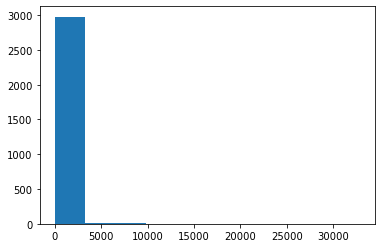

In [19]:
# Runs the simulation a bunch of times, and looks for how often the fano (cv/mean) comes out to one side

def simLuriaDelbruck(cultureSize, mutationRate):
    nCells, nMuts = 1, 0  # Start with 1 non-resistant cell

    for _ in range(np.int(np.floor(np.log2(cultureSize)))):  # num of gens
        nCells = 2*nCells     # Double the number of cells, simulating division
        newMuts = np.random.poisson(nCells * mutationRate)  # de novo
        nMuts = nMuts * 2 + newMuts       # Previous mutants divide and add
        nCells = nCells - newMuts      # Non-resistant pop goes down by newMuts

    return nMuts
def CVofNRuns():
    l = []
    for i in range(3000):
        l.append(simLuriaDelbruck(120000,0.0001))
    return l
Y = CVofNRuns()
plt.hist(Y);
    

$\textbf{RESPONSE: The distribution of outcomes looks similar to pareto, most are concentrated near 0.}$

#### 5b. Compare the distribution of outcomes between the two replicates of the experiment using the 2-sample KS test. Are they consistent with one another?
Hint: Each experiment varies slightly in the amount of time it was run. The absolute values of the numbers doesn't matter, so much as the variation of them. You'll need to correct for this by dividing by the mean of the results.

In [20]:
# Answer to 5b
meanOne = np.mean(repOne)
meanTwo = np.mean(repTwo)
repOne = repOne/meanOne
repTwo = repTwo/meanTwo
print(ks_2samp(repOne,repTwo))
#yes, pvalue is not < 0.05

KstestResult(statistic=0.25100240577385724, pvalue=0.17846555487320592)


$\textbf{Yes, pvalue is not < 0.05}$

#### 5c. Compare the distribution of outcomes between the experiment and model. Are our results consistent with resistance arising through a Luria-Delbruck related process?

In [21]:
# Answer to 5c

meanY = np.mean(Y)
Y = Y/meanY
ks_2samp(repOne,Y)



KstestResult(statistic=0.7317209302325581, pvalue=1.7028721257772172e-23)

$\textbf{P-value says otherwise. Because it is less than 0.05, the data supports rejecting the hypothesis that they are not consistent with resistance}$

#### 5d. We assumed a specific mutation rate and final number of cells. How might you show whether or not these parameters influence our results?

Answer. But we could also vary them. Set either parameter to 0 to see if it INFLUENCES our results. Alternatively,we can also adjust the two paramets and just check it.